# Download data

In [478]:
!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [479]:
import zipfile

comp_name = "spaceship-titanic"
with zipfile.ZipFile(f"{comp_name}.zip","r") as zip_ref:
    zip_ref.extractall(comp_name)

# Initial EDA

In [480]:
import pandas as pd

df = pd.read_csv(f"{comp_name}/train.csv")
df.head(7)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True


In [481]:
len(df)

8693

In [482]:
df.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


We should be able to get rid of the Name field as it intuitively does not let any model learn any patterns.

In [483]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [484]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

# Split Data

In [485]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Data Cleaning

In [486]:
def add_group_num(df):
    df['GroupNum'] = df['PassengerId'].apply(lambda x: int(x.split('_')[0]))

add_group_num(train_df)
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNum
2333,2513_01,Earth,False,NaN,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,Loree Mathison,False,2513
2589,2774_02,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False,2774
8302,8862_04,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,True,8862
8177,8736_02,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,NaN,2.0,289.0,976.0,0.0,Tros Pota,True,8736
500,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True,539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,6076_01,Earth,NaN,G/988/S,TRAPPIST-1e,18.0,False,14.0,2.0,144.0,610.0,0.0,Therry Cames,True,6076
5191,5537_01,Mars,False,F/1063/S,TRAPPIST-1e,50.0,NaN,690.0,0.0,30.0,762.0,428.0,Herms Bancy,False,5537
5390,5756_06,Earth,False,F/1194/P,PSO J318.5-22,22.0,False,158.0,0.0,476.0,0.0,26.0,Karena Briggston,False,5756
860,0925_01,Mars,False,F/191/P,TRAPPIST-1e,34.0,False,379.0,0.0,1626.0,0.0,0.0,Skix Kraie,False,925


In [487]:
def fill_column_nan(df, column):
    most_frequent = df[column].mode()[0]
    df[column].fillna(most_frequent, inplace=True)

def fill_df_nans(df):
    fill_column_nan(df, 'HomePlanet')
    fill_column_nan(df, 'CryoSleep')
    fill_column_nan(df, 'Cabin')
    fill_column_nan(df, 'Destination')
    fill_column_nan(df, 'Age')
    fill_column_nan(df, 'VIP')
    fill_column_nan(df, 'RoomService')
    fill_column_nan(df, 'FoodCourt')
    fill_column_nan(df, 'ShoppingMall')
    fill_column_nan(df, 'Spa')
    fill_column_nan(df, 'VRDeck')


fill_df_nans(train_df)
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNum
2333,2513_01,Earth,False,B/82/S,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,Loree Mathison,False,2513
2589,2774_02,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False,2774
8302,8862_04,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,True,8862
8177,8736_02,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,0.0,2.0,289.0,976.0,0.0,Tros Pota,True,8736
500,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True,539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,6076_01,Earth,False,G/988/S,TRAPPIST-1e,18.0,False,14.0,2.0,144.0,610.0,0.0,Therry Cames,True,6076
5191,5537_01,Mars,False,F/1063/S,TRAPPIST-1e,50.0,False,690.0,0.0,30.0,762.0,428.0,Herms Bancy,False,5537
5390,5756_06,Earth,False,F/1194/P,PSO J318.5-22,22.0,False,158.0,0.0,476.0,0.0,26.0,Karena Briggston,False,5756
860,0925_01,Mars,False,F/191/P,TRAPPIST-1e,34.0,False,379.0,0.0,1626.0,0.0,0.0,Skix Kraie,False,925


In [488]:
train_df.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [489]:
def remove_unnecessary_columns(df):
    df.drop(columns=['PassengerId', 'Name'], inplace=True)

remove_unnecessary_columns(train_df)
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNum
2333,Earth,False,B/82/S,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,False,2513
2589,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,False,2774
8302,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,True,8862
8177,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,0.0,2.0,289.0,976.0,0.0,True,8736
500,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,True,539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Earth,False,G/988/S,TRAPPIST-1e,18.0,False,14.0,2.0,144.0,610.0,0.0,True,6076
5191,Mars,False,F/1063/S,TRAPPIST-1e,50.0,False,690.0,0.0,30.0,762.0,428.0,False,5537
5390,Earth,False,F/1194/P,PSO J318.5-22,22.0,False,158.0,0.0,476.0,0.0,26.0,False,5756
860,Mars,False,F/191/P,TRAPPIST-1e,34.0,False,379.0,0.0,1626.0,0.0,0.0,False,925


# Feature engineering

In [490]:
def extract_cabin_info(df):
    df['CabinDeck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
    df['CabinNum'] = df['Cabin'].apply(lambda x: int(x.split('/')[1]))
    df['CabinSide'] = df['Cabin'].apply(lambda x: x.split('/')[2])

extract_cabin_info(train_df)
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNum,CabinDeck,CabinNum,CabinSide
2333,Earth,False,B/82/S,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,False,2513,B,82,S
2589,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,False,2774,F,575,P
8302,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,True,8862,C,329,S
8177,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,0.0,2.0,289.0,976.0,0.0,True,8736,F,1800,P
500,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,True,539,C,18,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Earth,False,G/988/S,TRAPPIST-1e,18.0,False,14.0,2.0,144.0,610.0,0.0,True,6076,G,988,S
5191,Mars,False,F/1063/S,TRAPPIST-1e,50.0,False,690.0,0.0,30.0,762.0,428.0,False,5537,F,1063,S
5390,Earth,False,F/1194/P,PSO J318.5-22,22.0,False,158.0,0.0,476.0,0.0,26.0,False,5756,F,1194,P
860,Mars,False,F/191/P,TRAPPIST-1e,34.0,False,379.0,0.0,1626.0,0.0,0.0,False,925,F,191,P


In [491]:
def remove_cabin_column(df):
    df.drop(columns=['Cabin'], inplace=True)

remove_cabin_column(train_df)
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNum,CabinDeck,CabinNum,CabinSide
2333,Earth,False,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,False,2513,B,82,S
2589,Earth,False,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,False,2774,F,575,P
8302,Europa,True,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,True,8862,C,329,S
8177,Mars,False,TRAPPIST-1e,20.0,False,0.0,2.0,289.0,976.0,0.0,True,8736,F,1800,P
500,Europa,True,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,True,539,C,18,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Earth,False,TRAPPIST-1e,18.0,False,14.0,2.0,144.0,610.0,0.0,True,6076,G,988,S
5191,Mars,False,TRAPPIST-1e,50.0,False,690.0,0.0,30.0,762.0,428.0,False,5537,F,1063,S
5390,Earth,False,PSO J318.5-22,22.0,False,158.0,0.0,476.0,0.0,26.0,False,5756,F,1194,P
860,Mars,False,TRAPPIST-1e,34.0,False,379.0,0.0,1626.0,0.0,0.0,False,925,F,191,P


In [492]:
def one_hot_encode(df):
    categories_to_encode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide', 'Transported']
    for col in categories_to_encode:
        try:
            df[col] = pd.Categorical(df[col]).codes
        except:
            pass

one_hot_encode(train_df)
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNum,CabinDeck,CabinNum,CabinSide
2333,0,0,2,28.0,0,0.0,55.0,0.0,656.0,0.0,0,2513,1,82,1
2589,0,0,2,17.0,0,0.0,1195.0,31.0,0.0,0.0,0,2774,5,575,0
8302,1,1,0,28.0,0,0.0,0.0,0.0,0.0,0.0,1,8862,2,329,1
8177,2,0,2,20.0,0,0.0,2.0,289.0,976.0,0.0,1,8736,5,1800,0
500,1,1,0,36.0,0,0.0,0.0,0.0,0.0,0.0,1,539,2,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,2,18.0,0,14.0,2.0,144.0,610.0,0.0,1,6076,6,988,1
5191,2,0,2,50.0,0,690.0,0.0,30.0,762.0,428.0,0,5537,5,1063,1
5390,0,0,1,22.0,0,158.0,0.0,476.0,0.0,26.0,0,5756,5,1194,0
860,2,0,2,34.0,0,379.0,0.0,1626.0,0.0,0.0,0,925,5,191,0


In [493]:
def full_data_engineering(df):
    add_group_num(df)
    fill_df_nans(df)
    remove_unnecessary_columns(df)
    extract_cabin_info(df)
    remove_cabin_column(df)
    one_hot_encode(df)

full_data_engineering(val_df)

# Prep Data for Model

In [494]:
# model params
batch_size = 128
learning_rate = 1e-3
epochs = 200

In [495]:
import torch

def get_tensors(df):
    x_df = df.drop(columns='Transported')
    y_df = df['Transported']

    x_tensor = torch.tensor(x_df.values, dtype=torch.float32)
    y_tensor = torch.tensor(y_df.values, dtype=torch.long)

    return x_tensor, y_tensor

In [496]:
x_train, y_train = get_tensors(train_df)
x_val, y_val = get_tensors(val_df)

In [497]:
input_dim = len(x_train[0])
input_dim

14

In [498]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [499]:
val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Model

In [500]:
import torch
import torch.nn as nn
import torch.optim as optim

def LogisticModel() -> nn.Module:
    model = nn.Sequential(
        nn.Linear(input_dim, 2),
        nn.Softmax()
    )

    return model

def Model2() -> nn.Module:
    model = nn.Sequential(
        nn.Linear(input_dim, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 2),
        nn.Softmax()
    )

    return model

In [501]:
def train_model(model):
    loss = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loss_arr = []
    val_loss_arr = []

    from tqdm import tqdm

    for i in tqdm(range(epochs)):
        train_loss, val_loss = 0, 0

        model.train()
        for X, y in train_loader:
            predictions = model.forward(X)
            output = loss(predictions, y)
            train_loss += output.item()

            # backprop
            optimizer.zero_grad()
            output.backward()
            optimizer.step()

        with torch.no_grad():
            model.eval()
            for X, y in val_loader:
                predictions = model.forward(X)
                output = loss(predictions, y)
                val_loss += output.item()

        train_loss_arr.append((train_loss*100)/len(train_loader.dataset))
        val_loss_arr.append((val_loss*100)/len(val_loader.dataset))

    return train_loss_arr, val_loss_arr

In [502]:
models = [
    LogisticModel(),
    LogisticModel(),
    LogisticModel(),
    Model2(),
    Model2(),
]

In [503]:
import matplotlib.pyplot as plt

def plot(train_loss, val_loss):
    plt.plot(train_loss_arr, label='Training Loss')
    plt.plot(val_loss_arr, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 200/200 [00:32<00:00,  6.24it/s]


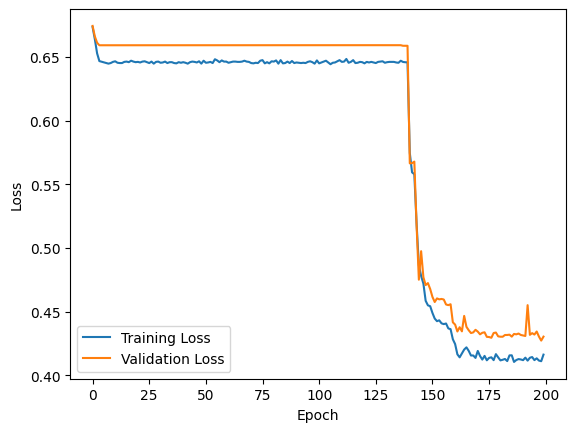

100%|██████████| 200/200 [00:33<00:00,  6.05it/s]


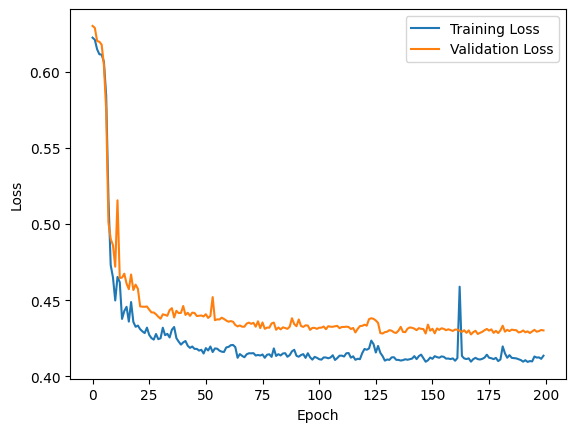

100%|██████████| 200/200 [00:31<00:00,  6.43it/s]


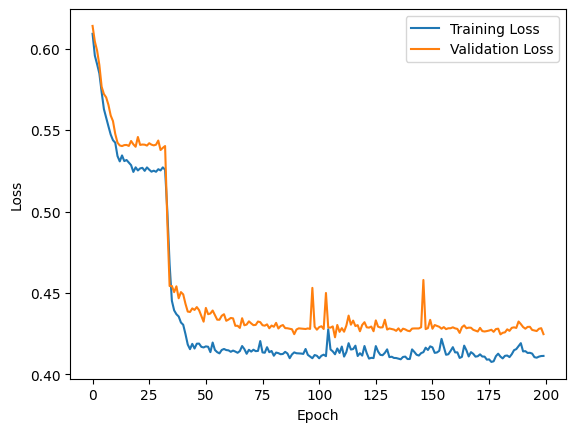

100%|██████████| 200/200 [00:39<00:00,  5.03it/s]


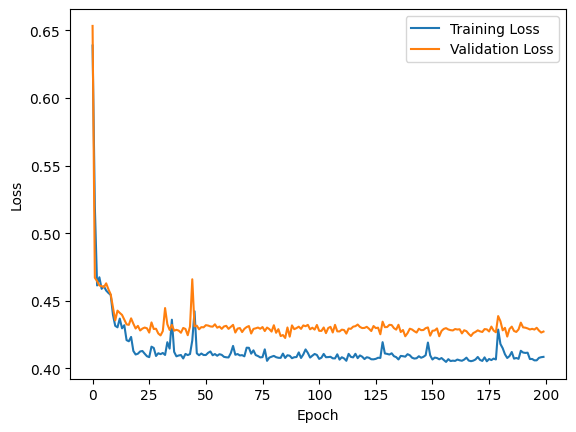

100%|██████████| 200/200 [00:40<00:00,  4.92it/s]


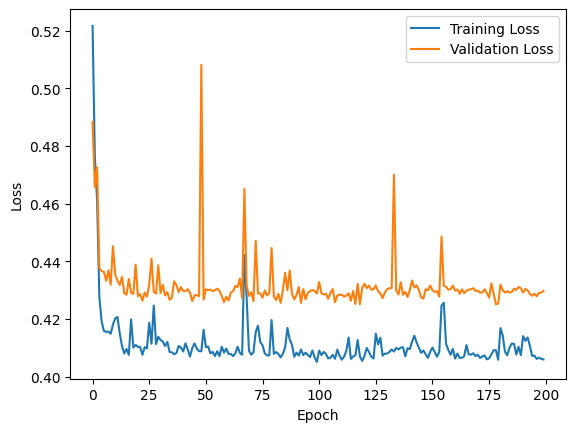

In [504]:
for model in models:
    train_loss_arr, val_loss_arr = train_model(model)
    plot(train_loss_arr, val_loss_arr)

In [505]:
def predict(x):
    model_predictions = []
    for model in models:
        predictions = model.forward(x)
        model_predictions.append(predictions)

    num_predictions = len(model_predictions[0])
    num_models = len(models)

    predictions = []
    for i in range(num_predictions):
        preds = []
        for j in range(num_models):
            preds.append(torch.argmax(model_predictions[j][i]))

        most_frequent = max(set(preds), key=preds.count)
        predictions.append(most_frequent)

    return predictions

In [506]:
def accuracy(predictions, actuals):
    num_correct = 0
    for i in range(len(predictions)):
        if predictions[i] == actuals[i]:
            num_correct += 1

    accuracy = num_correct / len(predictions)
    return accuracy

In [507]:
val_predictions = predict(x_val)
val_accuracy = accuracy(val_predictions, y_val)
print("Test accuracy:", val_accuracy)

Test accuracy: 0.7791834387579069


# Kaggle Submission

In [ ]:
test_df = pd.read_csv(f"{comp_name}/test.csv")
full_data_engineering(test_df)
x_test = torch.tensor(test_df.values, dtype=torch.float32)
test_predictions = predict(x_test)

In [ ]:
predictions = []
for pred in test_predictions:
    if pred == 1:
        predictions.append(True)
    else:
        predictions.append(False)

In [ ]:
test_df = pd.read_csv(f"{comp_name}/test.csv")
test_df['Transported'] = predictions

In [ ]:
submission_df = test_df[['PassengerId', 'Transported']]
submission_df

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c spaceship-titanic -f submission.csv -m "Bagging a few neural nets"

Best achieved score with test set on Kaggle: 0.79494